# Intro
The following notebooks replicate the results of the examples provided in the paper, thereby validating the findings presented. Specifically, the examples reproduced are 3.1, 4.3, 5.4, 5.7, 5.9, and 5.10, as appeared in the paper.

# Example 3.1 : Running Example

This example illustrates our ongoing analysis of the 4-qubit Draper Adder. The following script presents both a correct implementation and an example of a faulty implementation. Specifically, we will calculate that in the buggy implementation, where the $Z^{0.02}$ gate is misplaced, the probability of measuring $\ket{E_\bot}$, denoted as $ b = |\braket{E_\bot | P}|^2 $, is found to be 0.001.

In [11]:
from casestudy_pgm.draper_adder.draper_bug import draper_buggy
from casestudy_pgm.draper_adder.draper_correct import draper_true
import math, cirq
import numpy as np
from qruntest.fpaa_in_matrix import get_prob

num_qubit = 4
in_sv = cirq.one_hot(index=0, shape = (2**num_qubit,), dtype=np.complex128)
E_state = in_sv
print(f"On Input state vector of {cirq.dirac_notation(in_sv)}")
print("[Correct Implementation]")
correct_qc = draper_true(m=int(num_qubit/2))
res_sv_correct = cirq.final_state_vector(correct_qc, initial_state=in_sv)
print("Quantum Circuit : ")
print(correct_qc)
print(f"Output State Vector : {cirq.dirac_notation(res_sv_correct,decimals=3)} ")

print("------------------------------------------------------------")
## buggy implementation
t= 0.02
buggy_qc = draper_buggy(m=int(num_qubit/2), bug_control_param=  np.arcsin( t / math.pi))
print("[Buggy Implementation]")
print("Quantum Circuit : ")
print(buggy_qc)
res_sv_buggy = cirq.final_state_vector(buggy_qc, initial_state=in_sv)
print(f"Output State Vector : {cirq.dirac_notation(res_sv_buggy,decimals=3)} ")
print(f"Probability of Measuring E_bot : {1-round(get_prob(curr_state=res_sv_buggy, target=E_state),4)}")

On Input state vector of |0000⟩
[Correct Implementation]
Quantum Circuit : 
0: ────────────────@───────────────────────────
                   │
1: ────────────────┼───@───@───────────────────
                   │   │   │
2: ───qft[norev]───Z───S───┼───qft[norev]^-1───
      │                    │   │
3: ───#2───────────────────Z───#2──────────────
Output State Vector : |0000⟩ 
------------------------------------------------------------
[Buggy Implementation]
Quantum Circuit : 
0: ────────────────@────────────────────────────────────
                   │
1: ────────────────┼───@───@────────────────────────────
                   │   │   │
2: ───qft[norev]───Z───S───┼────────────qft[norev]^-1───
      │                    │            │
3: ───#2───────────────────Z───Z^0.02───#2──────────────
Output State Vector : (0.999+0.031j)|0000⟩ + (-0.015-0.016j)|0001⟩ + (0.016-0.015j)|0011⟩ 
Probability of Measuring E_bot : 0.0010000000000000009


Aside, we can check that for all input $|I\rangle \in \{0,1\}^n$, the buggy circuit gives a buggy state where $|E_\bot\rangle$ is superposed with the same low probability of $0.001$ (the $|E\rangle$ corresponds to each $|I\rangle$). For the proof generalized to the number of qubits $n$, see Section B of the Supplementary Material.

In [2]:
from casestudy_pgm.draper_adder.draper_bug import draper_buggy
from casestudy_pgm.draper_adder.draper_correct import draper_true

import math, cirq
import numpy as np
from qruntest.fpaa_in_matrix import get_prob

num_qubit = 4
bug_qc = draper_buggy(m=int(num_qubit/2), bug_control_param=  np.arcsin( t / math.pi))
correct_qc = draper_true(m=int(num_qubit/2))

for i in range(2 ** (num_qubit)):
    in_sv = cirq.one_hot(index =i , shape= (2 ** (num_qubit),), dtype=np.complex128)
    print(f"On Input |I> = {cirq.dirac_notation(in_sv)}")
    res_sv = cirq.final_state_vector(bug_qc, initial_state=in_sv) #buggy res
    E_state = cirq.final_state_vector(correct_qc, initial_state=in_sv) # correct res, which becomes desired spec state
    print("State Vector : ")
    print(cirq.dirac_notation(res_sv,decimals=3))
    print(f"Probability of Measuring E_bot : {round(1-get_prob(curr_state=res_sv, target=E_state),3)}")

On Input |I> = |0000⟩
State Vector : 
(0.999+0.031j)|0000⟩ + (-0.015-0.016j)|0001⟩ + (0.016-0.015j)|0011⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0001⟩
State Vector : 
(0.016-0.015j)|0000⟩ + (0.999+0.031j)|0001⟩ + (-0.015-0.016j)|0010⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0010⟩
State Vector : 
(0.016-0.015j)|0001⟩ + (0.999+0.031j)|0010⟩ + (-0.015-0.016j)|0011⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0011⟩
State Vector : 
(-0.015-0.016j)|0000⟩ + (0.016-0.015j)|0010⟩ + (0.999+0.031j)|0011⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0100⟩
State Vector : 
(0.016-0.015j)|0100⟩ + (0.999+0.031j)|0101⟩ + (-0.015-0.016j)|0110⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0101⟩
State Vector : 
(0.016-0.015j)|0101⟩ + (0.999+0.031j)|0110⟩ + (-0.015-0.016j)|0111⟩
Probability of Measuring E_bot : 0.001
On Input |I> = |0110⟩
State Vector : 
(-0.015-0.016j)|0100⟩ + (0.016-0.015j)|0110⟩ + (0.999+0.031j)|0111⟩
Probability of Measuring

# Example 4.3

In this example, we derive the number of measurements required for the \textsc{Sample} algorithm to achieve an assurance level of $\eta = 0.01%$.

In [12]:
from qruntest.assurance_ftn import derive_required_num_sample_for_base
import math
confi = 0.0001
tol = 0.001
NUM_sample_for_baseline = math.ceil(derive_required_num_sample_for_base(confidence=confi, w=tol)) #derived k by given $epsilon = 0.001 and confidence= 0.01%=0.0001
print(f"k = {NUM_sample_for_baseline}")
print(f"Assurance that SAMPLE gives with {NUM_sample_for_baseline} mesaurement is :")
print(f"{ round((1-tol) ** (NUM_sample_for_baseline+1) * 100, 6)}%") # rounds to 0.01%

k = 9205
Assurance that SAMPLE gives with 9205 mesaurement is :
0.009997%


# Example 5.4
In this example, we derive the smallest $l$ such that $\omega_\delta(l) < \epsilon$ (with $\delta = \sqrt{0.05}$ and $\epsilon = 0.001$). Additionally, we demonstrate through simulation that running $l$-FPAA requires, on average, at most two measurements for the detection of $\text{P}_{buggy}$.

In [13]:
from qruntest.fpaa_circuit import get_omega
import math
l=34
delta = math.sqrt(0.05)
omega  = get_omega(L = 2*l+1, delta = math.sqrt(0.05))
print(f"Omega at l={l} and delta={delta} is {round(omega,6)}")

Omega at l=34 and delta=0.22360679774997896 is 0.000996


We prepared a simulated implementation of the FPAA circuit. Given that $\delta = \sqrt{0.05}$, the expected number of measurement trials is $1/0.95 \simeq 1.05$. Therefore, using $l$-FPAA, the bug will be detected within at most two measurement trials. This can be confirmed in the following simulation.

In [5]:
from qruntest.assertion_check_fpaa import assert_check_fpaa
from casestudy_pgm.draper_adder.draper_bug import draper_buggy
from qruntest.hyper_parameters import HypeParamConfig
import logging, math
import numpy as np

num_qubit = 4
t= 0.02 # bug parameter, standing injection of $Z^t$ as in Fig 6
qc = draper_buggy(m=int(num_qubit/2), bug_control_param=  np.arcsin( t / math.pi))
config = HypeParamConfig(DELTA=math.sqrt(0.05), strat=[(34,6)], NUM_base_execution=None, label="Example")
num_measure_list =list()
for i in range(100): # increase number of shot for better accurate statistics in required # measurements for $\ket{E_\bot}$ detection.
    _, idx, _, _, _= assert_check_fpaa(expect_sv=None,
                        pgm=qc,
                        config= config,
                        logging_option = logging.CRITICAL,
                        do_debug=False,
                        do_without_simul=False)
    num_measure = idx+1 # since idx strats with 0
    num_measure_list.append(num_measure)
print(f"Average : {sum(num_measure_list)/len(num_measure_list)}")

BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 1
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 1
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting from 0) is 0
BUG DETECTED!!!!! END. The l-value was 34 and sequence (starting

# Example 5.7
below, we can check that by $M_{34}^6$ event we obtain assurance level $<\eta=0.01\%$ as desired.

In [6]:
import scipy.integrate as integrate
from typing import Tuple, List
import sympy, random, math, cirq
from qruntest.score_strat import event_dist
import numpy as np
from qruntest.hyper_parameters import HypeParamConfig
from qruntest.assurance_ftn import derive_credible_level

tolerance = 0.001
eta = 0.0001 # 0.01%
l = 34
m = 6
strat= HypeParamConfig(DELTA=math.sqrt(0.05), strat=[(l,m)], NUM_base_execution=None, label=None)
def val_by_b(b : float) : # P(M | b)
    builder = 1
    for l_idx, l in enumerate(strat.l_SEQ) :
        builder = builder * event_dist(l =l, m= strat.NUM_measure_per_l[l_idx], b=b)
    return builder 
derived_confi_res = np.abs(integrate.quad(val_by_b, tolerance, 1)[0] ) /  (np.abs((integrate.quad(val_by_b, 0,0.5)[0])) +  np.abs((integrate.quad(val_by_b, 0.5,1)[0])))
print(f"On l = {l} , m = {m}")
print("Assurance Level ", round(derived_confi_res,20))
print(f"Lower than assurance level? {round(derived_confi_res,5) < eta}")


On l = 34 , m = 6
Assurance Level  6.484519564897251e-05
Lower than assurance level? True


Additionally, you can run the verification (simulation) as follows

In [2]:
from qruntest.assertion_check_fpaa import assert_check_fpaa
from casestudy_pgm.draper_adder.draper_correct import draper_true
from qruntest.hyper_parameters import HypeParamConfig
import logging, math
import numpy as np

num_qubit = 4
qc = draper_true(m=int(num_qubit/2))
config = HypeParamConfig(DELTA=math.sqrt(0.05), strat=[(34,6)], NUM_base_execution=None, label="Example")
num_measure_list =list()
_, idx, _, _, _= assert_check_fpaa(expect_sv=None,
                                pgm=qc,
                                config= config,
                                logging_option = logging.DEBUG,
                                do_debug=False,
                                do_without_simul=False)


INFO : Do l-variant fpaa-based assertion check
INFO : Hyper Paramter Settings
INFO : DETLA                : 0.22360679774997896
INFO : STRAT                :
INFO : [(34, 6)]
INFO : Init SV       : |0000⟩
DEBUG : 
Trying for l-value 34
DEBUG : ω                    : 0.0009959502356854388
DEBUG : ω_in_amplitude       : 0.03155867924494685
DEBUG : State After Amplified : (0.3298467-0.9440345j)|00000000⟩
DEBUG : Measuring non-targ                                 : -9.192646643896296e-14
DEBUG : P_L (must be coincide with above)                  : 0.0005079780293837377


Given Program is NOT buggy


# Reproducing Figure 2 (for Example 5.9 and 5.10)

DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG : Loaded b

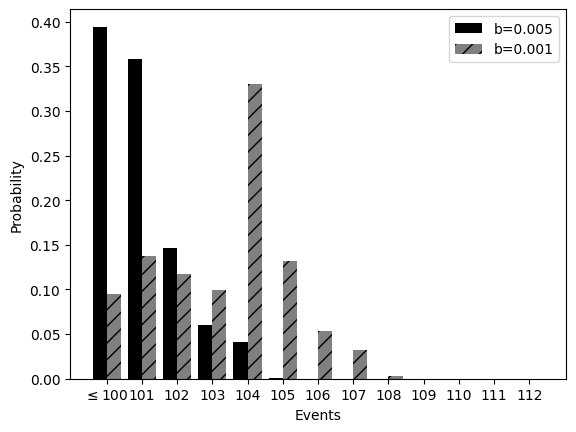

In [8]:
from qruntest.fpaa_in_matrix import get_prob, get_omega
from qruntest.expectation import  SymCostStatisticFPAA, SymCostStatisticBase
from qruntest.hyper_parameters import HypeParamConfig
from qruntest.symbolic_cost_model import sym_moment_cost_for_my_draper
from matplotlib import pyplot as plt
from sympy import symbols, lambdify
import numpy as np
import math, logging

logging.getLogger('matplotlib.font_manager').disabled = True
n = symbols("n")
# fig, ax = plt.subplots()
strat_special = HypeParamConfig(DELTA=math.sqrt(0.05), strat= [(0, 100), (9, 3), (21, 3), (32, 6)], NUM_base_execution=None, label=None)
colors = ['black','gray']
margin = [-0.2, 0.2]
hatches = ["", "//"]
list_tex = [r"$\leq 100$",str(101),str(102),str(103),str(104),str(105),str(106),str(107),str(108),str(109),str(110),str(111),str(112)]
X_axis = np.arange(len(list_tex)) 

for color_idx, b in enumerate([0.005, 0.001]):
    cost_fpaa = SymCostStatisticFPAA(prob_measure_zero=1-b
                        ,sym_pgm_cnot_cost=None
                        ,sym_pgm_all_gate_cost=None
                        , sym_pgm_moment_cost=sym_moment_cost_for_my_draper()
                        , pgm_qc= None
                        , config=strat_special
                        )
    event_probs = list()
    for idx, _ord in enumerate(cost_fpaa.hyp_param_sequence):
        l_val, m_val = _ord
        curr_event_prob = cost_fpaa.derive_event_prob_per_ord(ord_idx=idx)
        event_probs.append(curr_event_prob)
    
    data = [sum(event_probs[:100])] + [ x  for x in event_probs[100:]] # within system, the index strats with 0 while in the example we assumed index starts with 1
    plt.bar(X_axis + margin[color_idx], data,0.4, align='center', color = colors[color_idx], hatch=hatches[color_idx], label = f"b={b}")

plt.ylabel("Probability")
plt.xlabel("Events")
plt.legend()
plt.xticks(X_axis, list_tex)
plt.savefig('fig2.pdf')
plt.show()


# Example 5.9

From this exaple, we can check that running $s$-FPAA (with $s=\langle (0, 100), (9, 3), (21, 3), (32, 6) \rangle$) indeed required only 9 run of Grover Operator (in expectation), constrats to running $l$-FPAA where it required running Grover Operator 34 times.

In [1]:
from qruntest.fpaa_in_matrix import get_prob, get_omega
from qruntest.expectation import  SymCostStatisticFPAA, SymCostStatisticBase
from qruntest.hyper_parameters import HypeParamConfig
from qruntest.symbolic_cost_model import sym_moment_cost_for_my_draper
from matplotlib import pyplot as plt
from sympy import symbols, lambdify
import numpy as np
import math, logging

logging.getLogger('matplotlib.font_manager').disabled = True
b = 0.005
n = symbols("n")
strat_special = HypeParamConfig(DELTA=math.sqrt(0.05), strat= [(0, 100), (9, 3), (21, 3), (32, 6)], NUM_base_execution=None, label=None)
cost_fpaa = SymCostStatisticFPAA(prob_measure_zero=1-b
                    ,sym_pgm_cnot_cost=None
                    ,sym_pgm_all_gate_cost=None
                    , sym_pgm_moment_cost=sym_moment_cost_for_my_draper()
                    , pgm_qc= None
                    , config=strat_special
                    )

print(f"Curr Strat : {strat_special.str_in_tuple()}")
print(f"EXPECTED NUM G when b={b} is", cost_fpaa.expected_num_g_iterate())

Curr Strat : [(0, 100), (9, 3), (21, 3), (32, 6)]
EXPECTED NUM G when b=0.005 is 9.470001877433475


# Example 5.10 

Following code produces event distribution of random varaible $X_{s,b}$ for $b =0.001 (=\epsilon)$ and $s= \langle(3, 2), (10, 1)\rangle$ and show that such $s$ does not satisfy constrait (16).

Aside, we also calculate that $s=\langle (0, 100), (9, 3), (21, 3), (32, 6) \rangle$ satisfies constraint (16) for $b \in [1, \epsilon]$, hence will be proper choice of strategy for bug detection.

In [3]:
from qruntest.utils import prob_L
from qruntest.expectation import  SymCostStatisticFPAA

DELTA = math.sqrt(0.05)
b=0.001
l_1 = 3
res = prob_L(delta=DELTA, lamb=0.001, L = 2*l_1+1)
print(f"b_{l_1}={round(res, 4)}")

l_2 = 10
res = prob_L(delta=DELTA, lamb=0.001, L = 2*l_2+1)
print(f"b_{l_2}={round(res,4)}")

strat = HypeParamConfig(DELTA=DELTA, strat=[(l_1,2),(l_2,1)], NUM_base_execution=None)

cost_fpaa = SymCostStatisticFPAA(prob_measure_zero=1-b
                                ,sym_pgm_cnot_cost=None
                                ,sym_pgm_all_gate_cost=None
                                , sym_pgm_moment_cost=None
                                , pgm_qc= None
                                , config=strat
                                )
event_prob_sum = cost_fpaa.event_prob_sum()
cost_fpaa.print_event_prob()
print(f"Probability of |X_s,b| <= |seq(s)| for b = {b}, s={strat.str_in_tuple()} is {event_prob_sum}") # not close to 1

print("===========================")

strat = HypeParamConfig(DELTA=DELTA, strat=[(0, 100), (9, 3), (21, 3), (32, 6)], NUM_base_execution=None)

print(f"Check that for s={strat.str_in_tuple()} and several b values, the P(|X_s,b| <= |seq(s)|) is close to 1")
for b in np.linspace(0.001, 1, 10, endpoint=True):
    cost_fpaa = SymCostStatisticFPAA(prob_measure_zero=1-b
                                    ,sym_pgm_cnot_cost=None
                                    ,sym_pgm_all_gate_cost=None
                                    , sym_pgm_moment_cost=None
                                    , pgm_qc= None
                                    , config=strat
                                    )
    event_prob_sum = cost_fpaa.event_prob_sum()
    print(f"Probability of |X_s,b| <= |seq(s)| for s={strat.str_in_tuple()} at b={b} is {event_prob_sum}") # not close to 1



b_3=0.0224
b_10=0.1832
On idx 1 ord (3, 1) : 0.022434431960126622
On idx 2 ord (3, 2) : 0.02193112822275307
On idx 3 ord (10, 1) : 0.17507975461658118
Check inf Prob sum is close to 1 : 0.2194453147994609
Probability of |X_s,b| <= |seq(s)| for b = 0.001, s=[(3, 2), (10, 1)] is 0.2194453147994609
Check that for s=[(0, 100), (9, 3), (21, 3), (32, 6)] and several b values, the P(|X_s,b| <= |seq(s)|) is close to 1
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (21, 3), (32, 6)] at b=0.001 is 0.9999999902590491
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (21, 3), (32, 6)] at b=0.112 is 1.0
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (21, 3), (32, 6)] at b=0.223 is 0.9999999999999997
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (21, 3), (32, 6)] at b=0.334 is 0.9999999999999998
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (21, 3), (32, 6)] at b=0.445 is 1.0
Probability of |X_s,b| <= |seq(s)| for s=[(0, 100), (9, 3), (